In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
# Load your dataset (make sure to adjust the file name/path)
df = pd.read_csv('MAHA_POLLANARUWA.csv')  # Replace with your actual file name

In [3]:
# Display the first few rows of the dataframe
print(df.head())

   YEAR  MAINLY BY TRACTOR   BUFFALOE PLOUGHED   BUFFALOE MUDDED   \
0  2014              98.50%               0.80%             0.00%   
1  2015              99.50%               0.50%             0.00%   
2  2016              97.60%               2.40%             0.00%   
3  2017             100.00%               0.00%             0.00%   
4  2018              98.10%               1.90%             0.00%   

   BY MAMOTEE   MANNUAL   MACHINE    SCORE MAINLY BY TRACTOR   \
0        0.70%    31.70%    68.30%                     15.760   
1        0.00%    27.10%    72.90%                     15.920   
2        0.00%     3.50%    96.50%                     15.616   
3        0.00%     8.80%    91.20%                     16.000   
4        0.00%    13.70%    86.30%                     15.696   

    SCORE BUFFALOE PLOUGHED    SCORE BUFFALOE MUDDED   ...  \
0                      0.112                        0  ...   
1                      0.070                        0  ...   
2       

In [4]:
# Define the variables
variables = ['TOTALTECHNOLOGYSCORE', 'TOTALFERTILIZERSCORE', 'TOTALWEEDINGSCORE', 'TOTALINSECTICIDESSCORE', 'TOTALSEEDSCORE']

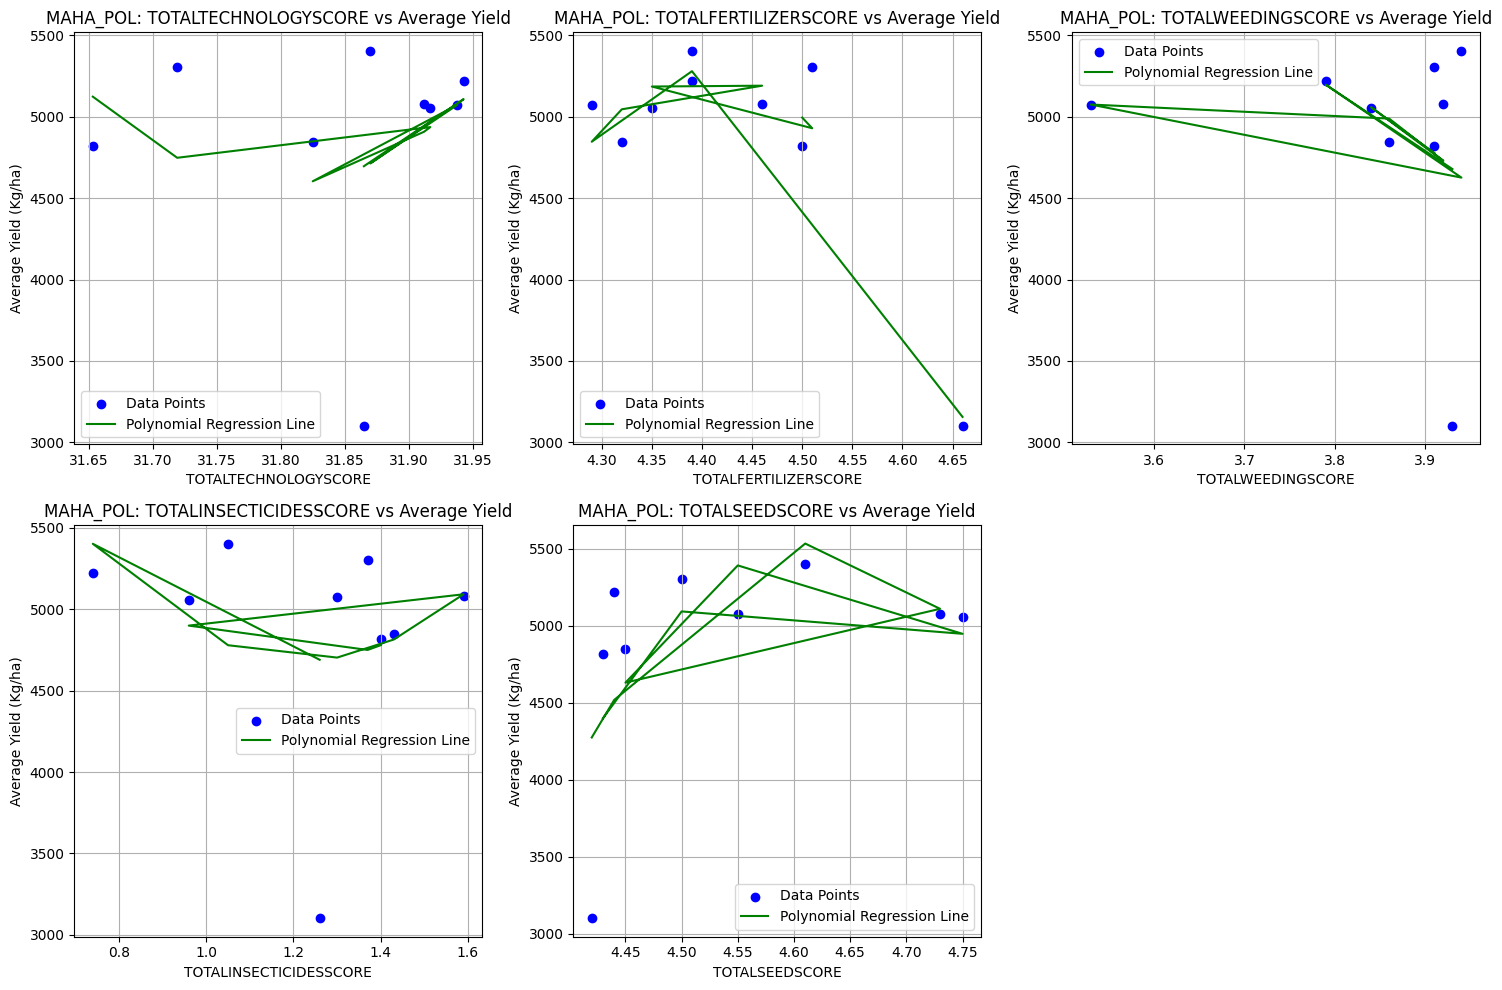

In [5]:
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables):
    # Prepare the data
    X = df[[var]]  # Independent variable
    Y = df['AverageYieldKgPERha']  # Dependent variable

    # Polynomial fitting (degree 2)
    coefficients = np.polyfit(X[var].values, Y, 2)  # Change degree as needed
    polynomial = np.poly1d(coefficients)

    # Predict values
    Y_poly_pred = polynomial(X[var].values)

    # Plotting
    plt.subplot(2, 3, i + 1)
    plt.scatter(X, Y, color='blue', label='Data Points')
    plt.plot(X, Y_poly_pred, color='green', label='Polynomial Regression Line')  # Polynomial regression line
    plt.title(f'MAHA_POL: {var} vs Average Yield')
    plt.xlabel(var)
    plt.ylabel('Average Yield (Kg/ha)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

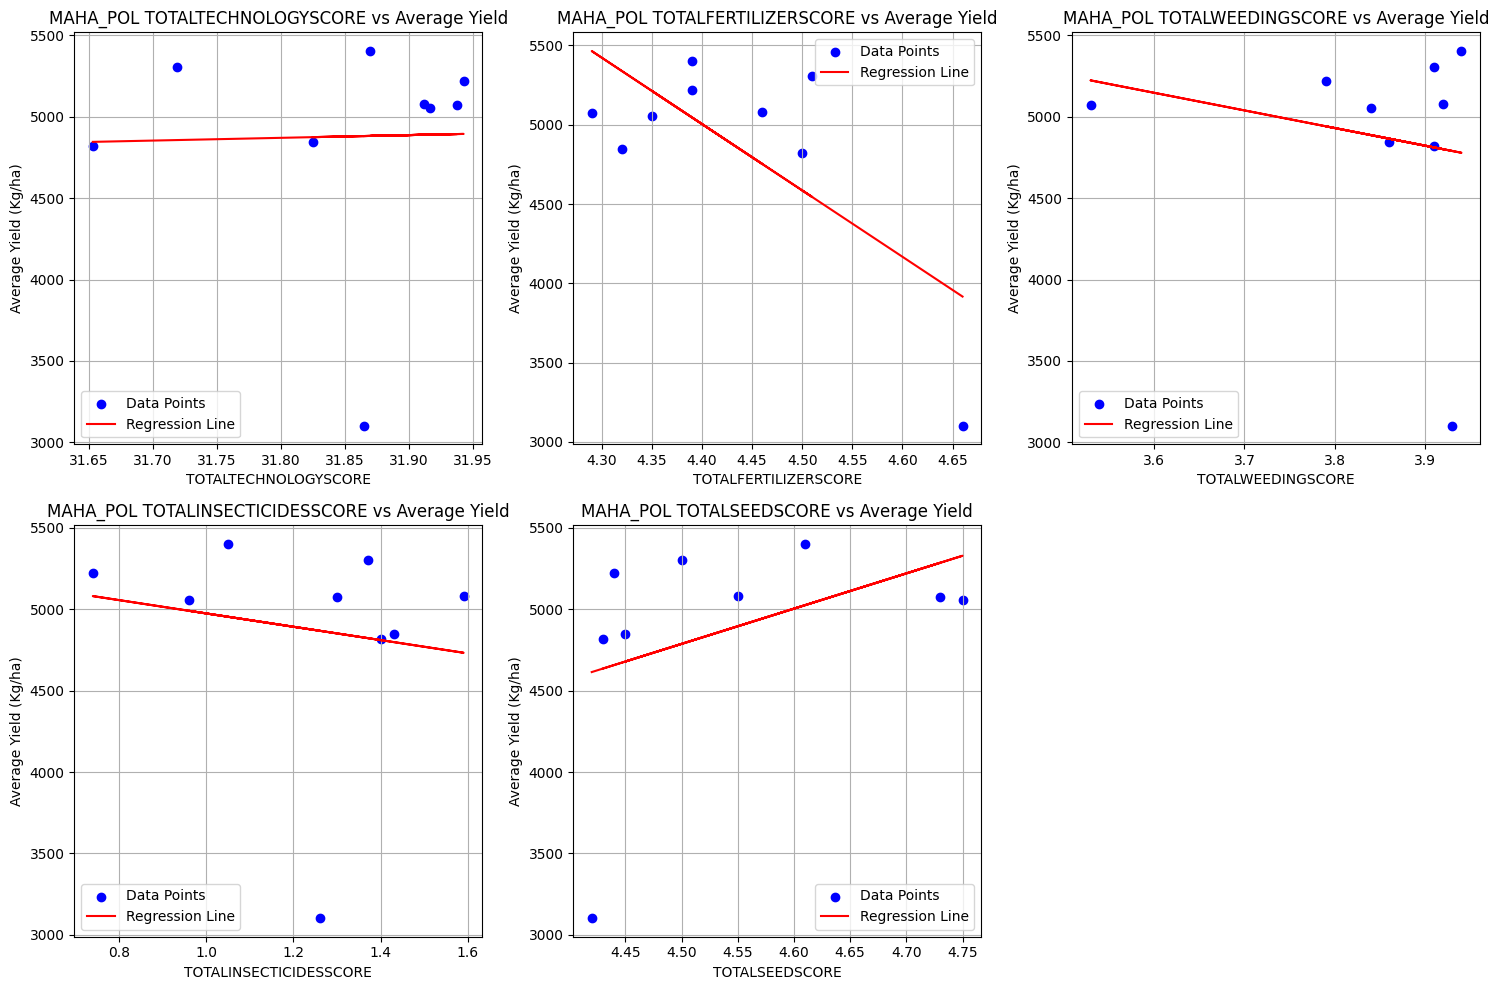

In [6]:
# Define the variables to plot
#variables = ['TOTALTECHNOLOGYSCORE', 'TOTALFERTILIZERSCORE', 'TOTALWEEDINGSCORE', 'TOTALINSECTICIDESSCORE', 'TOTALSEEDSCORE']

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables):
    # Prepare the data
    X = df[[var]]  # Independent variable
    Y = df['AverageYieldKgPERha']  # Dependent variable

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, Y)

    # Predict values
    Y_pred = model.predict(X)

    # Plotting
    plt.subplot(2, 3, i + 1)
    plt.scatter(X, Y, color='blue', label='Data Points')
    plt.plot(X, Y_pred, color='red', label='Regression Line')  # Regression line
    plt.title(f'MAHA_POL {var} vs Average Yield')
    plt.xlabel(var)
    plt.ylabel('Average Yield (Kg/ha)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [7]:
# Define the variables to calculate correlation with Average Yield
#variables = ['TOTALSEEDSCORE', 'TOTALWEEDINGSCORE', 'TOTALFERTILIZERSCORE', 'TOTALTECHNOLOGYSCORE', 'TOTALINSECTICIDESSCORE']

# Calculate and print correlations
for var in variables:
    correlation = df[var].corr(df['AverageYieldKgPERha'])
    print(f'MAHA_POL_Correlation between {var} and Average Yield: {correlation}')

MAHA_POL_Correlation between TOTALTECHNOLOGYSCORE and Average Yield: 0.024591906076663655
MAHA_POL_Correlation between TOTALFERTILIZERSCORE and Average Yield: -0.6964012255668797
MAHA_POL_Correlation between TOTALWEEDINGSCORE and Average Yield: -0.20160174187632265
MAHA_POL_Correlation between TOTALINSECTICIDESSCORE and Average Yield: -0.15767187809193298
MAHA_POL_Correlation between TOTALSEEDSCORE and Average Yield: 0.40042039366995225


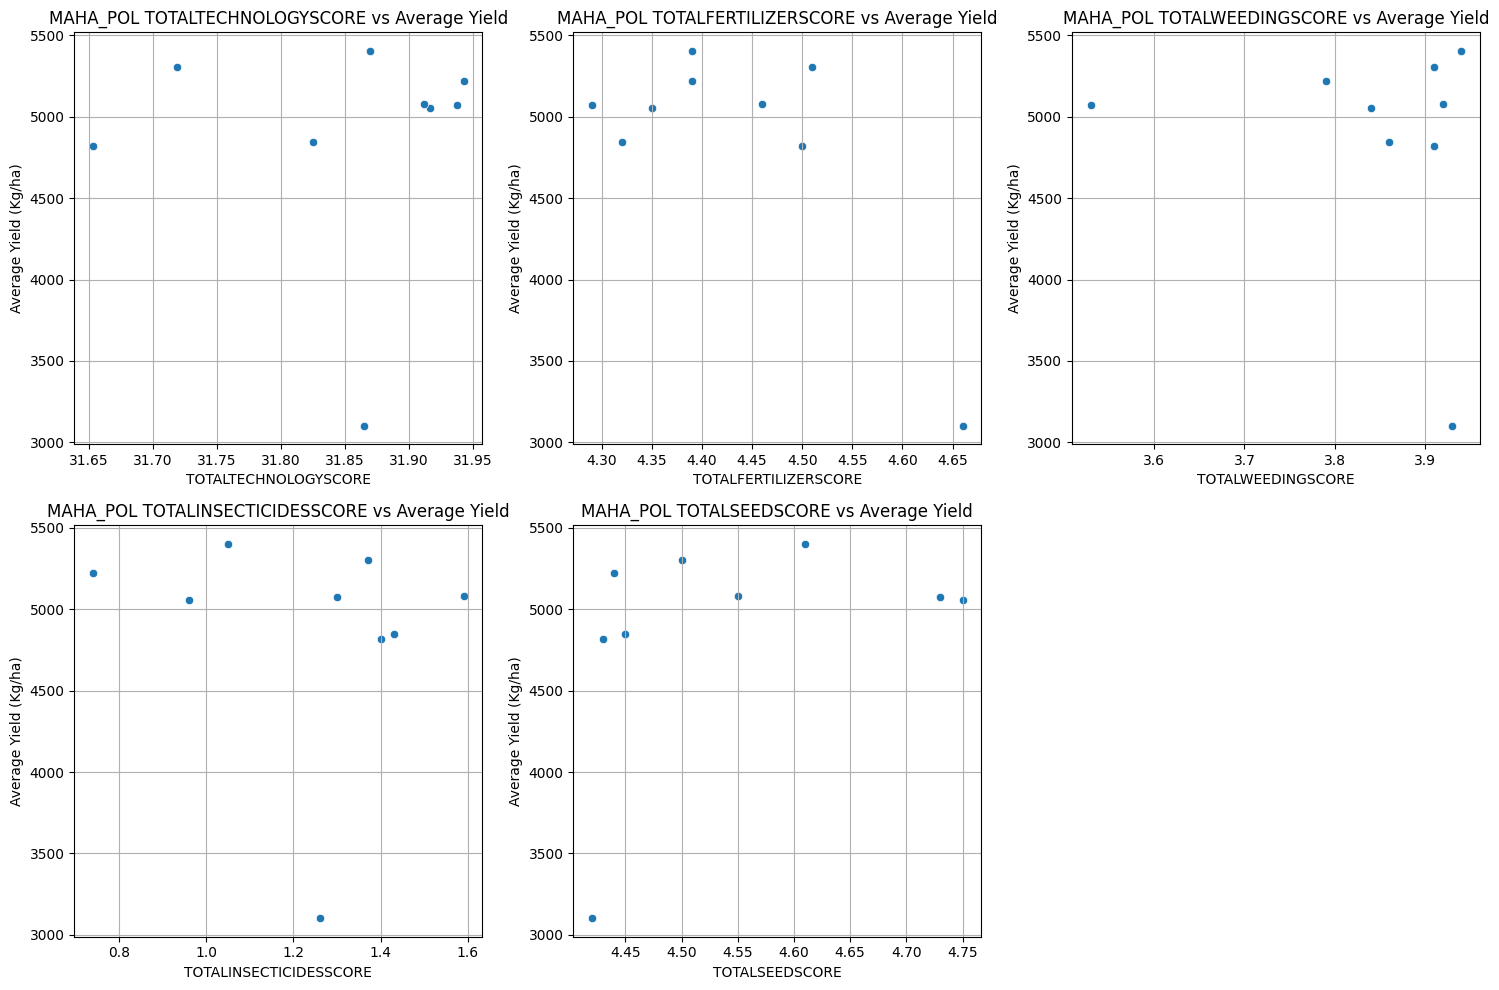

In [8]:
# Plotting scatter plots for each variable against Average Yield
#variables = ['TOTALTECHNOLOGYSCORE', 'TOTALFERTILIZERSCORE', 'TOTALWEEDINGSCORE', 'TOTALINSECTICIDESSCORE', 'TOTALSEEDSCORE']

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=df[var], y=df['AverageYieldKgPERha'])
    plt.title(f'MAHA_POL {var} vs Average Yield')
    plt.xlabel(var)
    plt.ylabel('Average Yield (Kg/ha)')
    plt.grid(True)

plt.tight_layout()
plt.show()

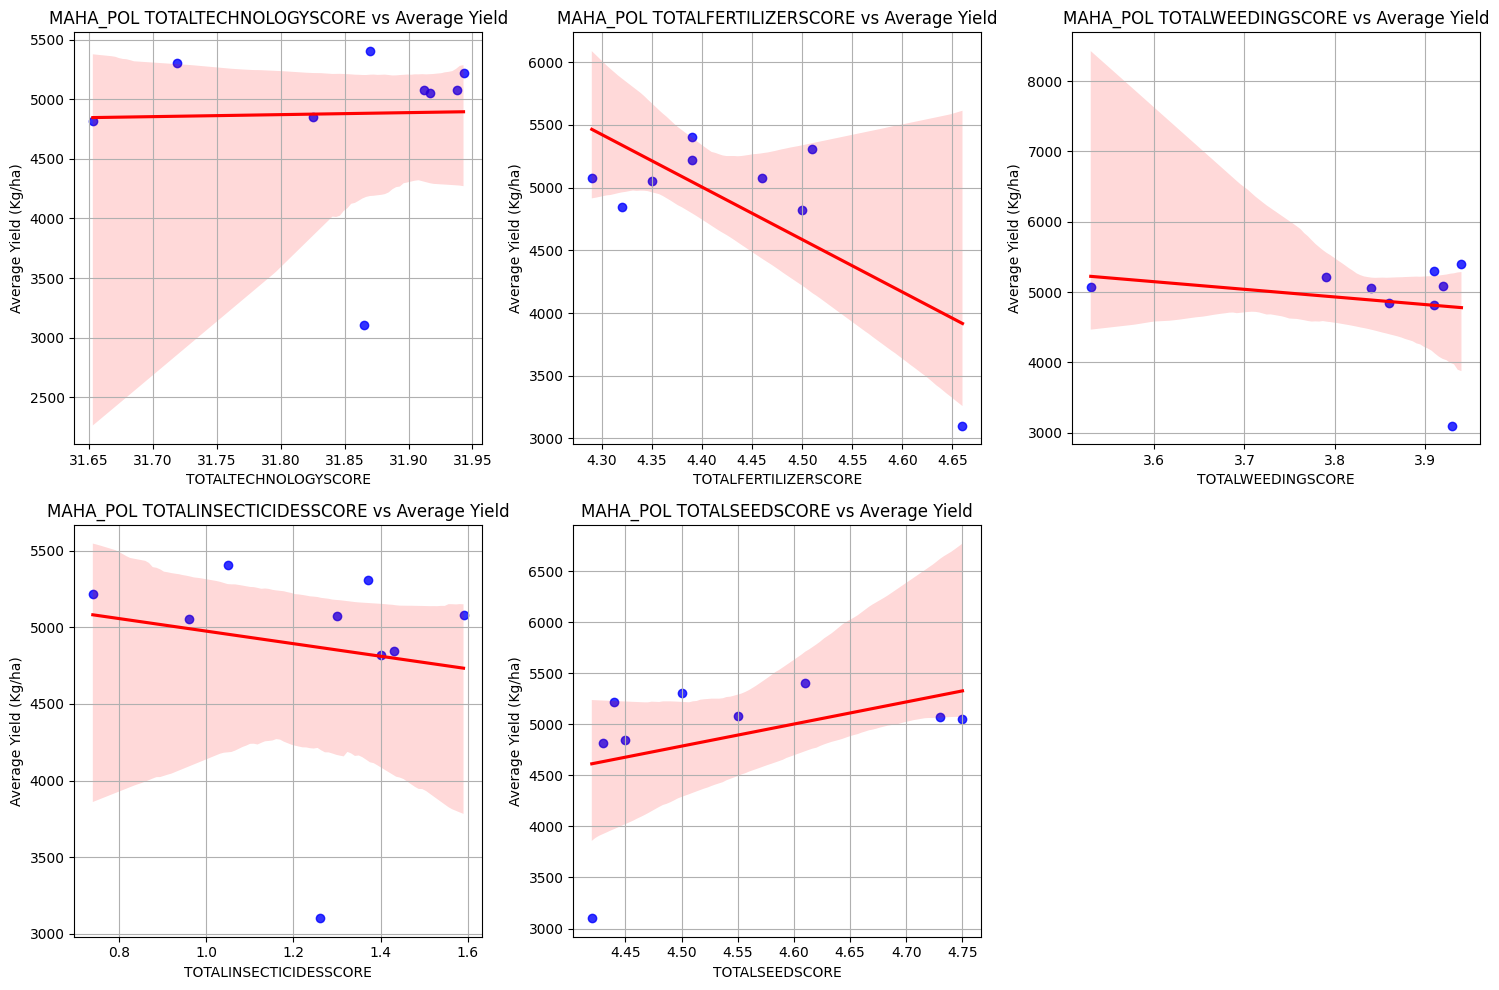

In [9]:
# Define the variables to plot
#variables = ['TOTALTECHNOLOGYSCORE', 'TOTALFERTILIZERSCORE', 'TOTALWEEDINGSCORE', 'TOTALINSECTICIDESSCORE', 'TOTALSEEDSCORE']

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables):
    plt.subplot(2, 3, i + 1)
    sns.regplot(x=df[var], y=df['AverageYieldKgPERha'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    plt.title(f'MAHA_POL {var} vs Average Yield')
    plt.xlabel(var)
    plt.ylabel('Average Yield (Kg/ha)')
    plt.grid(True)

plt.tight_layout()
plt.show()


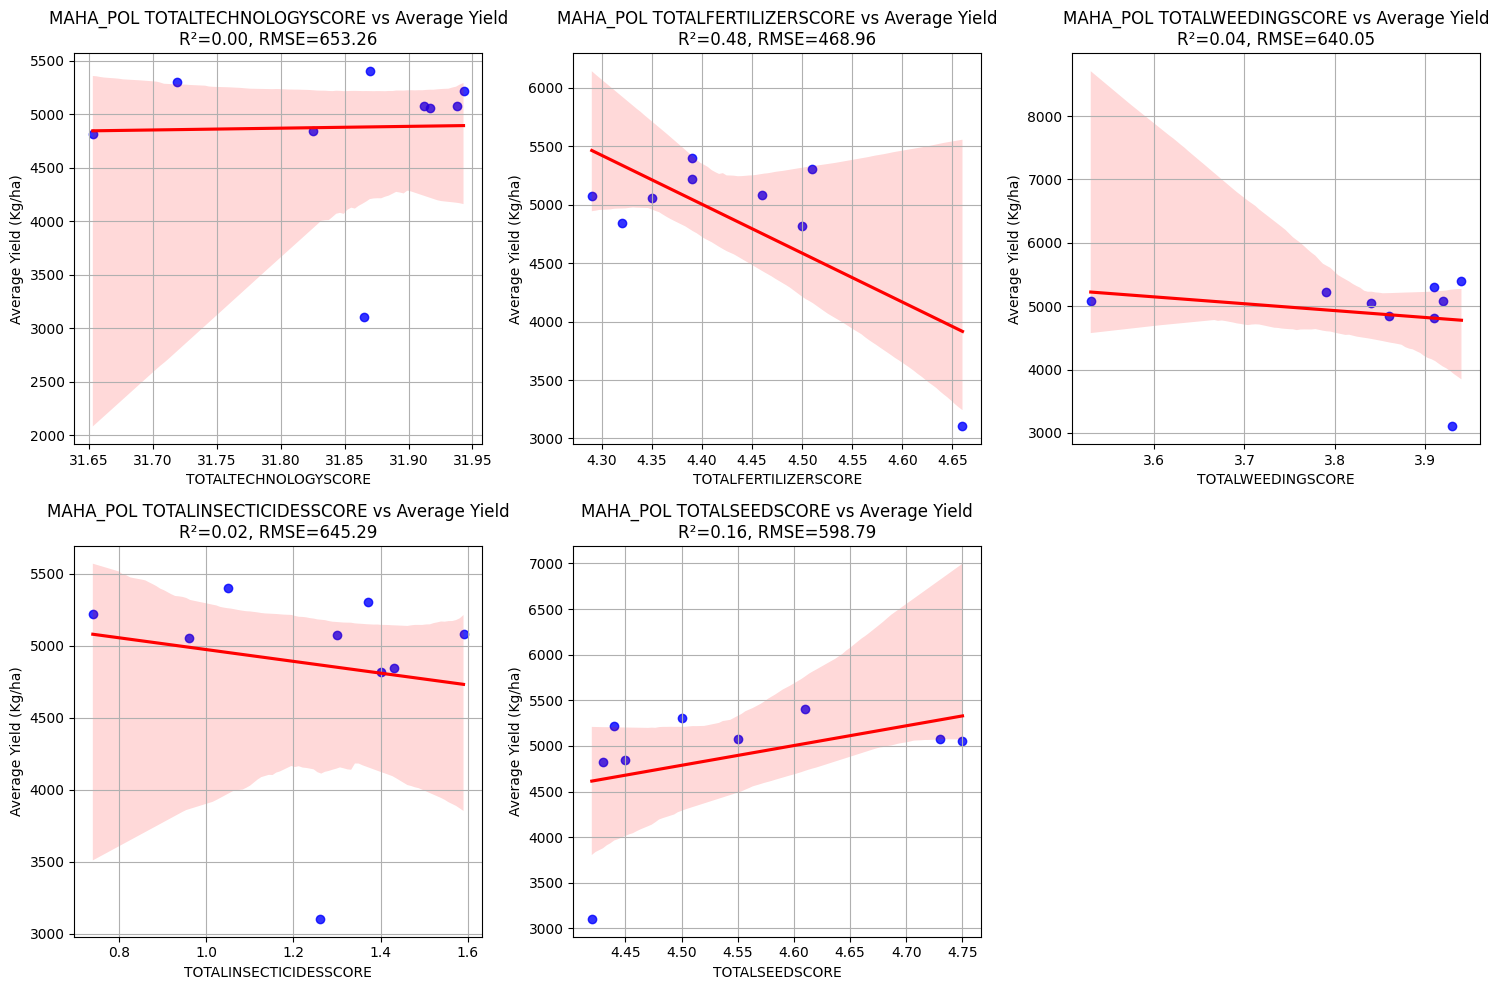

In [10]:
# Define the variables to plot
#variables = ['TOTALTECHNOLOGYSCORE', 'TOTALFERTILIZERSCORE', 'TOTALWEEDINGSCORE', 'TOTALINSECTICIDESSCORE', 'TOTALSEEDSCORE']

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables):
    plt.subplot(2, 3, i + 1)

    # Fit the regression model
    X = df[var]
    y = df['AverageYieldKgPERha']

    # Add a constant to the model (intercept)
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()

    # Get predictions
    predictions = model.predict(X_with_const)

    # Calculate RMSE
    rmse = np.sqrt(np.mean((predictions - y) ** 2))

    # Plotting
    sns.regplot(x=X, y=y, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

    # Title and labels
    plt.title(f'MAHA_POL {var} vs Average Yield\nR²={model.rsquared:.2f}, RMSE={rmse:.2f}')
    plt.xlabel(var)
    plt.ylabel('Average Yield (Kg/ha)')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
# Define the variables to calculate correlation with Average Yield
#variables = ['TOTALTECHNOLOGYSCORE', 'TOTALFERTILIZERSCORE', 'TOTALWEEDINGSCORE', 'TOTALINSECTICIDESSCORE', 'TOTALSEEDSCORE']

# Calculate and print both Pearson and Spearman correlations
for var in variables:
    pearson_corr = df[var].corr(df['AverageYieldKgPERha'])
    spearman_corr = df[var].corr(df['AverageYieldKgPERha'], method='spearman')
    print(f'MAHA_POL_Correlation between {var} and Average Yield:')
    print(f'  Pearson Correlation: {pearson_corr}')
    print(f'  Spearman Correlation: {spearman_corr}\n')

MAHA_POL_Correlation between TOTALTECHNOLOGYSCORE and Average Yield:
  Pearson Correlation: 0.024591906076663655
  Spearman Correlation: 0.3

MAHA_POL_Correlation between TOTALFERTILIZERSCORE and Average Yield:
  Pearson Correlation: -0.6964012255668797
  Spearman Correlation: -0.11715583722580122

MAHA_POL_Correlation between TOTALWEEDINGSCORE and Average Yield:
  Pearson Correlation: -0.20160174187632265
  Spearman Correlation: 0.06694619270045785

MAHA_POL_Correlation between TOTALINSECTICIDESSCORE and Average Yield:
  Pearson Correlation: -0.15767187809193298
  Spearman Correlation: -0.2333333333333333

MAHA_POL_Correlation between TOTALSEEDSCORE and Average Yield:
  Pearson Correlation: 0.40042039366995225
  Spearman Correlation: 0.4666666666666666



In [12]:
import pandas as pd
from scipy.stats import pearsonr
# Calculate Pearson's correlation
for var in variables:
    correlation_coefficient, p_value = pearsonr(df['AverageYieldKgPERha'], df[var])
    print(f"Variable: {var}")
    print(f"  Pearson Correlation Coefficient (r): {correlation_coefficient:.4f}")
    print(f"  P-value: {p_value:.4f}")
    alpha = 0.05
    if p_value < alpha:
        print(f"  The correlation is statistically significant (p < {alpha}).")
        if correlation_coefficient > 0:
            print("  Positive linear relationship.")
        else:
            print("  Negative linear relationship.")
    else:
        print(f"  The correlation is not statistically significant (p >= {alpha}).")
    print()


Variable: TOTALTECHNOLOGYSCORE
  Pearson Correlation Coefficient (r): 0.0246
  P-value: 0.9499
  The correlation is not statistically significant (p >= 0.05).

Variable: TOTALFERTILIZERSCORE
  Pearson Correlation Coefficient (r): -0.6964
  P-value: 0.0371
  The correlation is statistically significant (p < 0.05).
  Negative linear relationship.

Variable: TOTALWEEDINGSCORE
  Pearson Correlation Coefficient (r): -0.2016
  P-value: 0.6030
  The correlation is not statistically significant (p >= 0.05).

Variable: TOTALINSECTICIDESSCORE
  Pearson Correlation Coefficient (r): -0.1577
  P-value: 0.6854
  The correlation is not statistically significant (p >= 0.05).

Variable: TOTALSEEDSCORE
  Pearson Correlation Coefficient (r): 0.4004
  P-value: 0.2856
  The correlation is not statistically significant (p >= 0.05).

